### Importing used modules

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Reading the comperehensive covid dataset

In [13]:
covid_df = pd.read_csv('Team_work/data/covid_comperhensive.csv')
covid_df.head(2)

,countyFIPS,County Name,State,StateFIPS,2023-01-10_confirmed,2023-01-11_confirmed,2023-01-12_confirmed,2023-01-13_confirmed,2023-01-14_confirmed,2023-01-15_confirmed,2023-01-16_confirmed,2023-01-10_death,2023-01-11_death,2023-01-12_death,2023-01-13_death,2023-01-14_death,2023-01-15_death,2023-01-16_death,population
0,0,Statewide Unallocated,AL,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,Statewide Unallocated,AL,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


### Selecting the State (California)

In [14]:
covid_df_ca = covid_df[covid_df['StateFIPS'] == 6]
covid_df_ca.head(2)

,countyFIPS,County Name,State,StateFIPS,2023-01-10_confirmed,2023-01-11_confirmed,2023-01-12_confirmed,2023-01-13_confirmed,2023-01-14_confirmed,2023-01-15_confirmed,2023-01-16_confirmed,2023-01-10_death,2023-01-11_death,2023-01-12_death,2023-01-13_death,2023-01-14_death,2023-01-15_death,2023-01-16_death,population
204,0,Statewide Unallocated,CA,6,4252,4262,4270,4287,4301,4310,4312,0,0,0,0,0,0,0,0
205,0,Statewide Unallocated,CA,6,4252,4262,4270,4287,4301,4310,4312,0,0,0,0,0,0,0,0


### Dropping duplicates

In [15]:
covid_df_ca = covid_df_ca.drop_duplicates(subset=['countyFIPS'])
covid_df_ca.head(2)

,countyFIPS,County Name,State,StateFIPS,2023-01-10_confirmed,2023-01-11_confirmed,2023-01-12_confirmed,2023-01-13_confirmed,2023-01-14_confirmed,2023-01-15_confirmed,2023-01-16_confirmed,2023-01-10_death,2023-01-11_death,2023-01-12_death,2023-01-13_death,2023-01-14_death,2023-01-15_death,2023-01-16_death,population
204,0,Statewide Unallocated,CA,6,4252,4262,4270,4287,4301,4310,4312,0,0,0,0,0,0,0,0
2787,6001,Alameda County,CA,6,371682,371847,371955,372102,372232,372305,372364,2125,2125,2125,2125,2125,2125,2125,1671329


### Grouping by State to get an aggregative sum of the cases, and deaths

In [16]:
covid_df_ca_grp = covid_df_ca.groupby('State').sum(numeric_only=True).reset_index()
covid_df_ca_grp.head(1)

,State,countyFIPS,StateFIPS,2023-01-10_confirmed,2023-01-11_confirmed,2023-01-12_confirmed,2023-01-13_confirmed,2023-01-14_confirmed,2023-01-15_confirmed,2023-01-16_confirmed,2023-01-10_death,2023-01-11_death,2023-01-12_death,2023-01-13_death,2023-01-14_death,2023-01-15_death,2023-01-16_death,population
0,CA,351364,354,10980002,10983577,10987041,10989955,10992539,10994084,10995233,98584,98597,98601,98605,98606,98606,98607,39512223


### Plotting the number of cases for the selected dates [01-10-2023~01-16-2023]

<Axes: >

<Figure size 640x480 with 0 Axes>

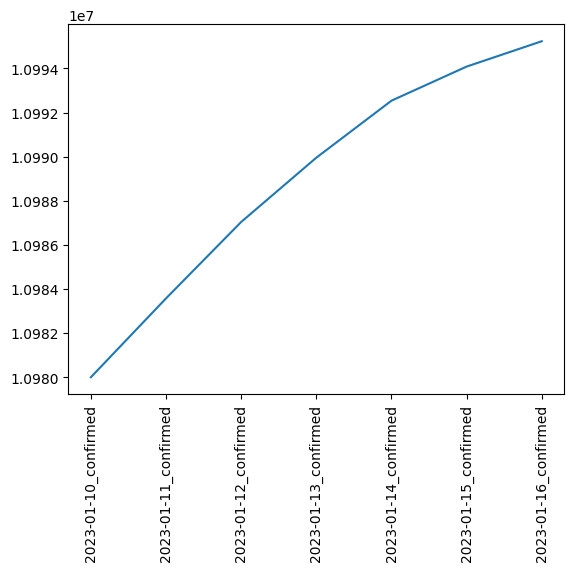

In [17]:
plt.tight_layout()
covid_df_ca_grp.iloc[:, 3:10].transpose().plot(legend=False, rot=90)

#### Observation:

As we can see that number of cases is on the rise for the mentioned dates

### Plotting the number of deaths for the mentioned dates [01-10-2023~01-16-2023]

<Axes: >

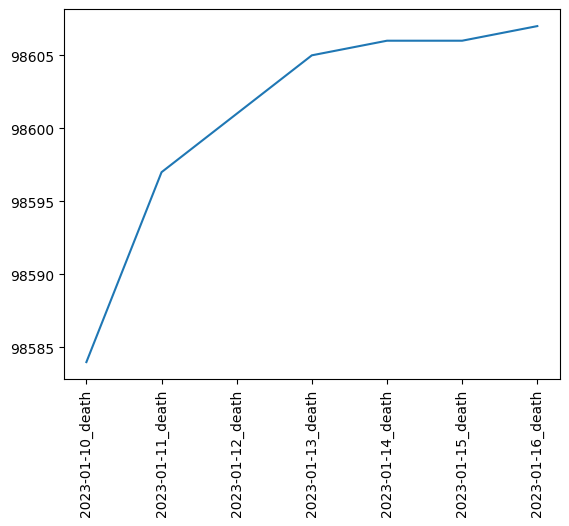

In [18]:
covid_df_ca_grp.iloc[:, 10:17].transpose().plot(legend=False, rot=90)

### Observation:

Similarily, the number of deaths is on the rise for the mentioned dates

## Enrichment Dataset

Here we are discussing the demographics dataset obtatined from Census, from the following [link](https://data.census.gov/table?q=dp&t=Age+and+Sex&g=0100000US$0400000&tid=ACSST1Y2021.S0101)

Dataset used was worked on to filter variables of interest, like percentage of age groups, and percentage of each sex.

The following cell reads the csv dataset, clarifies column names, and drops the irrelevant variables.

In [19]:
demographics_df = pd.read_csv('Team_work/data/demographics.csv')
for col_name in demographics_df.columns:
    if col_name.endswith('Margin of Error') or col_name.endswith('!!Total!!Estimate') or col_name.endswith('!!Male!!Estimate') or col_name.endswith('!!Female!!Estimate'):
        demographics_df = demographics_df.drop(col_name, axis=1)
demographics_df = demographics_df.drop(range(20, 42)).drop([0, 1]).reset_index().drop(['index'], axis=1)
demographics_df.rename(columns=lambda x: x[:-10], inplace=True)
for col_name in demographics_df.columns:
    if col_name.endswith('Percent'):
        demographics_df.rename(columns={col_name : col_name[:-9] + '_total'}, inplace=True)
    elif col_name.endswith('Male'):
        demographics_df.rename(columns={col_name : col_name[:-14] + '_male'}, inplace=True)
    elif col_name.endswith('Female'):
        demographics_df.rename(columns={col_name : col_name[:-16] + '_female'}, inplace=True)
demographics_df

,Label,Alabama_total,Alabama_male,Alabama_female,Alaska_total,Alaska_male,Alaska_female,Arizona_total,Arizona_male,Arizona_female,...,West Virginia_female,Wisconsin_total,Wisconsin_male,Wisconsin_female,Wyoming_total,Wyoming_male,Wyoming_female,Puerto Rico_total,Puerto Rico_male,Puerto Rico_female
0,Under 5 years,5.8%,6.1%,5.4%,6.3%,6.4%,6.2%,5.5%,5.6%,5.5%,...,4.8%,5.3%,5.5%,5.2%,5.2%,5.4%,5.1%,3.2%,3.2%,3.1%
1,5 to 9 years,5.9%,6.3%,5.5%,7.1%,6.7%,7.6%,6.1%,6.4%,5.9%,...,5.4%,5.8%,5.9%,5.8%,6.2%,6.0%,6.5%,4.6%,5.0%,4.2%
2,10 to 14 years,6.7%,6.9%,6.5%,7.2%,7.2%,7.1%,6.5%,6.6%,6.5%,...,5.9%,6.5%,6.8%,6.2%,7.1%,7.3%,6.9%,5.4%,5.8%,5.1%
3,15 to 19 years,6.7%,6.9%,6.6%,6.9%,7.3%,6.4%,6.6%,6.8%,6.5%,...,5.9%,6.6%,6.7%,6.4%,6.9%,6.9%,7.0%,6.3%,6.9%,5.7%
4,20 to 24 years,6.4%,6.6%,6.2%,6.3%,7.0%,5.5%,6.7%,6.9%,6.5%,...,6.1%,6.6%,6.7%,6.5%,6.2%,6.4%,6.0%,6.9%,7.3%,6.6%
5,25 to 29 years,6.2%,6.5%,6.0%,7.5%,7.5%,7.5%,6.9%,7.2%,6.7%,...,5.5%,6.3%,6.5%,6.1%,5.9%,6.2%,5.5%,6.3%,6.8%,5.9%
6,30 to 34 years,6.3%,6.3%,6.4%,7.9%,8.0%,7.7%,6.8%,7.1%,6.6%,...,5.7%,6.2%,6.4%,6.1%,6.3%,6.4%,6.1%,6.0%,6.4%,5.6%
7,35 to 39 years,6.2%,6.2%,6.2%,7.5%,7.6%,7.4%,6.5%,6.6%,6.3%,...,5.7%,6.5%,6.7%,6.3%,7.8%,7.5%,8.1%,5.7%,5.5%,5.9%
8,40 to 44 years,6.5%,6.7%,6.3%,6.6%,6.2%,7.0%,6.1%,6.3%,6.0%,...,6.5%,6.2%,6.2%,6.2%,6.1%,6.5%,5.7%,6.5%,6.4%,6.6%
9,45 to 49 years,6.0%,5.9%,6.1%,5.5%,5.6%,5.3%,5.8%,5.8%,5.7%,...,5.8%,5.7%,5.7%,5.6%,5.8%,5.9%,5.6%,6.3%,6.3%,6.3%


In [20]:
# United States of America Python Dictionary to translate States,
# Districts & Territories to Two-Letter codes and vice versa.
#
# Canonical URL: https://gist.github.com/rogerallen/1583593
#
# Dedicated to the public domain.  To the extent possible under law,
# Roger Allen has waived all copyright and related or neighboring
# rights to this code.  Data originally from Wikipedia at the url:
# https://en.wikipedia.org/wiki/ISO_3166-2:US
#
# Automatically Generated 2021-09-11 18:04:36 via Jupyter Notebook from
# https://gist.github.com/rogerallen/d75440e8e5ea4762374dfd5c1ddf84e0 

us_state_to_abbrev = {
    "Alabama": "AL",
    "Alaska": "AK",
    "Arizona": "AZ",
    "Arkansas": "AR",
    "California": "CA",
    "Colorado": "CO",
    "Connecticut": "CT",
    "Delaware": "DE",
    "Florida": "FL",
    "Georgia": "GA",
    "Hawaii": "HI",
    "Idaho": "ID",
    "Illinois": "IL",
    "Indiana": "IN",
    "Iowa": "IA",
    "Kansas": "KS",
    "Kentucky": "KY",
    "Louisiana": "LA",
    "Maine": "ME",
    "Maryland": "MD",
    "Massachusetts": "MA",
    "Michigan": "MI",
    "Minnesota": "MN",
    "Mississippi": "MS",
    "Missouri": "MO",
    "Montana": "MT",
    "Nebraska": "NE",
    "Nevada": "NV",
    "New Hampshire": "NH",
    "New Jersey": "NJ",
    "New Mexico": "NM",
    "New York": "NY",
    "North Carolina": "NC",
    "North Dakota": "ND",
    "Ohio": "OH",
    "Oklahoma": "OK",
    "Oregon": "OR",
    "Pennsylvania": "PA",
    "Rhode Island": "RI",
    "South Carolina": "SC",
    "South Dakota": "SD",
    "Tennessee": "TN",
    "Texas": "TX",
    "Utah": "UT",
    "Vermont": "VT",
    "Virginia": "VA",
    "Washington": "WA",
    "West Virginia": "WV",
    "Wisconsin": "WI",
    "Wyoming": "WY",
    "District of Columbia": "DC",
    "American Samoa": "AS",
    "Guam": "GU",
    "Northern Mariana Islands": "MP",
    "Puerto Rico": "PR",
    "United States Minor Outlying Islands": "UM",
    "U.S. Virgin Islands": "VI",
}

state_codes = {
    'WA': '53', 'DE': '10', 'DC': '11', 'WI': '55', 'WV': '54', 'HI': '15',
    'FL': '12', 'WY': '56', 'PR': '72', 'NJ': '34', 'NM': '35', 'TX': '48',
    'LA': '22', 'NC': '37', 'ND': '38', 'NE': '31', 'TN': '47', 'NY': '36',
    'PA': '42', 'AK': '02', 'NV': '32', 'NH': '33', 'VA': '51', 'CO': '08',
    'CA': '06', 'AL': '01', 'AR': '05', 'VT': '50', 'IL': '17', 'GA': '13',
    'IN': '18', 'IA': '19', 'MA': '25', 'AZ': '04', 'ID': '16', 'CT': '09',
    'ME': '23', 'MD': '24', 'OK': '40', 'OH': '39', 'UT': '49', 'MO': '29',
    'MN': '27', 'MI': '26', 'RI': '44', 'KS': '20', 'MT': '30', 'MS': '28',
    'SC': '45', 'KY': '21', 'OR': '41', 'SD': '46'
}

#### Cleaned Enrichment Dataset

The following cell does the following,

first it creates a new Dataframe, starts with two columns, 'StateFIPS' and 'State', then adds a column for 'Sex', Sex is going to be either 'M' for male, 'F' for female or 'T' for total, afterwards, the dataset is populated with data from the original enrichment dataset.

In [21]:
d = {'StateFIPS' : [int(i) for i in state_codes.values()], 'State' : state_codes.keys()}
demographics_cleaned_df = pd.DataFrame(data=d)
demographics_cleaned_df = pd.concat([demographics_cleaned_df]*3, ignore_index=True)
demographics_cleaned_df.sort_values('StateFIPS', inplace=True, ignore_index=True)
demographics_cleaned_df['Sex'] = ['T', 'M', 'F'] * int(len(demographics_cleaned_df)/3)
for x in demographics_df.set_index('Label ').transpose().columns:
    demographics_cleaned_df[x] = ''
for index, row in demographics_df.iterrows():
    demographics_cleaned_df[row.values[0]] = row.values[1:]
demographics_cleaned_df.to_csv('enrichment.csv', index=False)

### Merging the COVID-19 Comperhensive dataset with the Enrichment dataset

In [22]:
combined_df = covid_df.merge(demographics_cleaned_df, on=['StateFIPS', 'State'], how='left')
combined_df

,countyFIPS,County Name,State,StateFIPS,2023-01-10_confirmed,2023-01-11_confirmed,2023-01-12_confirmed,2023-01-13_confirmed,2023-01-14_confirmed,2023-01-15_confirmed,...,40 to 44 years,45 to 49 years,50 to 54 years,55 to 59 years,60 to 64 years,65 to 69 years,70 to 74 years,75 to 79 years,80 to 84 years,85 years and over
0,0,Statewide Unallocated,AL,1,0,0,0,0,0,0,...,6.5%,6.0%,6.3%,6.6%,6.8%,5.8%,4.9%,3.2%,2.1%,1.6%
1,0,Statewide Unallocated,AL,1,0,0,0,0,0,0,...,6.7%,5.9%,6.4%,6.7%,6.6%,5.4%,4.8%,2.9%,1.7%,1.1%
2,0,Statewide Unallocated,AL,1,0,0,0,0,0,0,...,6.3%,6.1%,6.2%,6.5%,7.0%,6.1%,5.1%,3.4%,2.4%,2.1%
3,0,Statewide Unallocated,AL,1,0,0,0,0,0,0,...,6.5%,6.0%,6.3%,6.6%,6.8%,5.8%,4.9%,3.2%,2.1%,1.6%
4,0,Statewide Unallocated,AL,1,0,0,0,0,0,0,...,6.7%,5.9%,6.4%,6.7%,6.6%,5.4%,4.8%,2.9%,1.7%,1.1%
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17224,56043,Washakie County,WY,56,2727,2727,2731,2731,2731,2731,...,6.5%,5.9%,5.8%,5.5%,7.2%,6.3%,5.0%,2.6%,1.8%,1.3%
17225,56043,Washakie County,WY,56,2727,2727,2731,2731,2731,2731,...,5.7%,5.6%,5.3%,6.2%,7.2%,6.6%,5.1%,3.1%,1.6%,2.5%
17226,56045,Weston County,WY,56,1880,1880,1881,1881,1881,1881,...,6.1%,5.8%,5.6%,5.8%,7.2%,6.4%,5.1%,2.9%,1.7%,1.9%
17227,56045,Weston County,WY,56,1880,1880,1881,1881,1881,1881,...,6.5%,5.9%,5.8%,5.5%,7.2%,6.3%,5.0%,2.6%,1.8%,1.3%
